# FYP Assignment 01
# Linear Regression - Hyperparameter Tuning

The Boston Housing Prices dataset shows the median prices (in thousands of USD) of 506 different houses in the city of Boston, MA in 1978. This dataset is a canonical introduction to regression - a class of ML problems in which a continuous-valued output, called the **target**, is predicted based on other numeric or categorical data i.e. the **features**.

Since this is an old and popular dataset, `keras` and other ML libraries such as `sklearn` already have the dataset built into them. As such, loading the dataset is usually as simple as a call to a function like `keras.datasets.boston_housing.load_data()`. Sometimes this data will already be preprocessed (normalized/standardized, missing values filled in, etc.), although this is not the case for the `keras` version of the dataset.

However, for completenes, I am going to demonstrate how to load the data from a comma-separated value (CSV) file i.e. how to load any dataset into a Jupyter Notebook for exploration/ML.

## Workspace Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot

# This is a Jupyter Notebook command that ensures all matplotlib plots are displayed
# inside the notebook and not in an external window.
%matplotlib inline

## Loading Dataset from CSV   
Assumes CSV (comma-separated value) file of the Boston Housing prices dataset is present in the same directory as this notebook i.e. the working directory.

If you don't have the Boston housing price CSV, you can find it [here](https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv).

Using `pandas` - a highly optimised Python Data Analysis library - to load data from the CSV file into a `dataframe`: `pandas`'s way of storing information. A `dataframe` is a lot like a spreadsheet (has indexed rows and labeled columns), which makes it easy to manipulate/wrangle/modify data.

In [2]:
# Good practice to store the raw data separately 
raw_data = pd.read_csv('BostonHousing.csv')

In [3]:
# Examine the head of the dataset - first five rows, gives a good overview of dataset columns and values
# Head can only be called on a dataframe
raw_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Since the data is numeric, we can also examine some statistical information about each column using `pandas`'s `.describe()` method.

In [4]:
raw_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Using the `.info()` method on a dataframe is a good way of quickly identifying the number and data types of each column in the dataframe.

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


We can see that we have 506 entries (rows) in the dataset, and 14 columns (including the index). We can find out what each of the columns mean by examining documentation for the dataset. Since this is a popular dataset, this won't be a problem. Just look at the descriptions [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

The `medv` column is the median value of the house in thousands of dollars (in the 1970s). This is our **target**: a continuous valued quantity that we will try to predict using all other columns i.e. **features** in the dataset.

We can see that there are 506 entries in **all** columns of the dataset. This means there are no missing values 
(`NaN`, `NULL`) although it does **not** mean that there are no outliers or erroneous values in the dataset.

Not necessary to do this, but I often like to use `seaborn` - a statistical plotting library that's built on top of `matplotlib` - to visualize relationships between individual columns in the dataset. It helps identify correlated features as well as the frequency distribution of values for individual features.

## Data Preprocessing

In [7]:
# First, extract the label from the dataset
raw_labels = raw_data['medv'] # Get the column named `medv` from the dataset

In [8]:
# Sanity check - did we get the right values? Compare against raw_data.head() earlier
raw_labels.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [9]:
# All columns except `medv` are features. So drop `medv` from dataframe and store result
raw_features = raw_data.drop('medv', axis=1)

In [10]:
# Sanity check - did we get the right values?
raw_features.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### Train-Test-Validation Split
Now that we've separated labels from data, we can start separating the dataset into training, validation, and test sets.
- **Training Set**: samples and labels that will be used to optimise the weights of our model using gradient descent i.e. the data the model will actually be trained on.
- **Validation Set**: samples that will **not** be used to optimise weights, but will be used to monitor the model's accuracy during training (as a way of detecting overfittng or underfitting). Validation set is often used during hyperparameter tuning (although this carries the risk of creating [data leaks](https://towardsdatascience.com/data-leakage-in-machine-learning-10bdd3eec742)).
- **Test Set**: samples that will be used to evaluate or test the final model's performance after all hyperparameter tuning/model training is done.

Again, `keras` and `sklearn` already provide built-in methods for defining train/test splits. I'm just doing it manually to show you how we'd go about doing this manually for completeness. `sklearn` lets you do this with any arbitrary dataset, so manually doing this isn't strictly necessary.

Since this isn't a very large dataset ($<10k$ samples), it's safer to specify a 75-15-15 train/validation/test split.

In [11]:
# Storing %age of all samples that will be assigned to each set
TRAIN_RATIO = 0.75
TEST_RATIO = 0.15
VAL_RATIO = 0.15

In [12]:
# Using these %ages to create sample indices. 
# Don't need to specify a TEST_INDEX - it's just the last index in the dataset
# Using ceil to round indices up and then casting to int - indices must always be ints
N_SAMPLES = len(raw_features)
TRAIN_INDEX = int(np.ceil(N_SAMPLES * TRAIN_RATIO))
VAL_INDEX = TRAIN_INDEX + int(np.ceil(N_SAMPLES * VAL_RATIO))

In [13]:
print("Total number of samples: ", N_SAMPLES)
print("Index of the last training sample: ", TRAIN_INDEX)
print("Index of the last validation sample: ", VAL_INDEX)
print("Indx of the last test sample: ", N_SAMPLES - 1) # accounting for 0 indexing

Total number of samples:  506
Index of the last training sample:  380
Index of the last validation sample:  456
Indx of the last test sample:  505


In [14]:
# Now indexing the features and labels to manually create train/validation/test features
# Using pandas `iloc` - index-based location function
# Training set: First index to TRAIN_INDEX - 1
raw_X_train = raw_features.iloc[:TRAIN_INDEX] 
y_train = raw_labels.iloc[:TRAIN_INDEX]

# Validation Set: Between TRAIN_INDEX and VAL_INDEX 
raw_X_val = raw_features.iloc[TRAIN_INDEX : VAL_INDEX]    
y_val = raw_features.iloc[TRAIN_INDEX : VAL_INDEX]

# Test Set: Between VAL_INDEX and the last index in the dataframe
raw_X_test = raw_features.iloc[VAL_INDEX:]    
y_test = raw_features.iloc[VAL_INDEX:]

In [15]:
# Sanity checks - using assert. If all conditions true, no O/P. Otherwise, error
# Do all features have the same number of columns?
assert (raw_X_train.shape[1] == raw_X_val.shape[1] and raw_X_train.shape[1] == raw_X_val.shape[1])

# One label per each set of features across all sets?
assert (len(raw_X_train) == len(y_train))
assert (len(raw_X_test) == len(y_test))
assert (len(raw_X_val) == len(y_val))

### Normalization
Looking back at the table generated by `raw_data.describe()`, it is clear that all features take drastically different values. This can skew the dataset's hypothesis: features with larger magnitudes can have a "greater effect" on the hypothesis output than those with smaller magnitudes.

This is why we normalize or standardize features: each feature should occupy roughly the same range. We do this by subtracting the mean of each feature from all samples and then dividing the resultant by the standard deviation of that feature.

Another caveat: we use the mean and standard deviation for the **training data** and only the training data when doing normalization. Although it may make more intuitive sense to use the validation set's mean/std for normalizing the validation features, and the test set's mean/std for normalizing the test set features, we use the **training mean and standard deviation** for this. 

We do this because when training an ML model, we always assume that we have the training data, and **only the training data** available to us. We want to fit the model to the training data, and not the validation or test data. Otherwise, the model's performance on these datasets would not be indicative of its performance on actual unseen data. 

If we use the mean of the validation or test sets to normalize these datasets, we're creating an unintentional data leak: implicitly, we're modifying the model's pipeline to fit data we technically don't even know exists. 

More details on page 86 of Deep Learning with Python by Francois Chollet, or [here](https://www.tensorflow.org/tutorials/keras/regression#normalize_the_data).

In [16]:
# Storing mean and standard deviation for the original training features
X_train_means = raw_X_train.mean(axis=0)
X_train_stds = raw_X_train.std(axis=0)

In [17]:
# This has calculated means and standard deviations for **each column** using the training data.
X_train_means

crim         0.935720
zn          15.131579
indus        8.959316
chas         0.092105
nox          0.521460
rm           6.372497
age         62.443947
dis          4.334727
rad          5.702632
tax        333.136842
ptratio     17.888947
b          379.545474
lstat       10.606737
dtype: float64

In [18]:
X_train_stds

crim         2.627286
zn          25.838060
indus        6.360139
chas         0.289556
nox          0.110250
rm           0.719396
age         28.794617
dis          2.150173
rad          5.004325
tax        108.641538
ptratio      2.218865
b           41.276383
lstat        6.182072
dtype: float64

In [19]:
# Normalizing features
X_train = (raw_X_train - X_train_means)/X_train_stds
X_val = (raw_X_val - X_train_means)/X_train_stds
X_test = (raw_X_test - X_train_means)/X_train_stds

In [20]:
# Did it work? Sort of 
X_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02
mean,8.414322e-17,-3.850721e-16,3.089926e-15,5.714727e-16,-7.775067e-15,-5.271295e-15,-3.044348e-16,4.511011e-16,-3.505967e-17,-1.565999e-16,1.399582e-14,1.457694e-14,7.368375e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.537491e-01,-5.856314e-01,-1.336341e+00,-3.180917e-01,-1.237735e+00,-3.908135e+00,-2.067885e+00,-1.490637e+00,-9.397135e-01,-1.345129e+00,-2.383628e+00,-7.479955e+00,-1.435884e+00
25%,-3.327113e-01,-5.856314e-01,-7.718881e-01,-3.180917e-01,-7.504312e-01,-6.126630e-01,-8.975270e-01,-8.444095e-01,-3.402320e-01,-5.811483e-01,-6.710402e-01,2.742552e-02,-7.277878e-01
50%,-3.021427e-01,-5.856314e-01,-3.222124e-01,-3.180917e-01,-2.037172e-01,-1.709731e-01,1.113421e-01,-1.583252e-01,-1.404049e-01,-2.405787e-01,9.511740e-02,3.081551e-01,-1.887291e-01
75%,-1.483708e-01,2.658257e-01,2.909817e-01,-3.180917e-01,2.316586e-01,4.917355e-01,9.743506e-01,6.459821e-01,-1.404049e-01,5.970383e-01,7.711388e-01,4.005808e-01,4.587075e-01
max,8.644846e+00,3.284628e+00,2.624264e+00,3.135475e+00,3.170445e+00,3.346561e+00,1.304273e+00,3.623789e+00,3.656311e+00,3.063866e+00,1.852773e+00,4.204469e-01,4.426228e+00


In [21]:
X_val.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,76.000000,7.600000e+01,7.600000e+01,7.600000e+01,76.000000,76.000000,76.000000,76.000000,7.600000e+01,7.600000e+01,7.600000e+01,76.000000,76.000000
mean,5.961772,-5.856314e-01,1.437183e+00,-3.180917e-01,1.491479,-0.544313,1.088179,-1.164213,3.656311e+00,3.063866e+00,1.041547e+00,-3.315365,1.753283
std,5.951101,2.235200e-16,1.341120e-15,1.117600e-16,0.423271,0.901748,0.279281,0.141090,3.129280e-15,4.023360e-15,2.011680e-15,3.903725,0.911137
min,1.452697,-5.856314e-01,1.437183e+00,-3.180917e-01,0.567261,-3.106074,-0.095294,-1.468080,3.656311e+00,3.063866e+00,1.041547e+00,-9.187469,-0.080351
25%,2.774073,-5.856314e-01,1.437183e+00,-3.180917e-01,1.428942,-1.053310,1.014289,-1.278049,3.656311e+00,3.063866e+00,1.041547e+00,-7.574621,1.075410
50%,3.877835,-5.856314e-01,1.437183e+00,-3.180917e-01,1.555926,-0.340560,1.182723,-1.169523,3.656311e+00,3.063866e+00,1.041547e+00,-1.457988,1.550979
75%,6.163882,-5.856314e-01,1.437183e+00,-3.180917e-01,1.737333,0.076109,1.304273,-1.072100,3.656311e+00,3.063866e+00,1.041547e+00,0.368238,2.236429
max,33.510051,-5.856314e-01,1.437183e+00,-3.180917e-01,1.982232,1.418555,1.304273,-0.855106,3.656311e+00,3.063866e+00,1.041547e+00,0.420447,4.266088


In [22]:
X_test.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,50.000000,5.000000e+01,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.252694,-5.856314e-01,1.280174,-3.180917e-01,0.783679,-0.408645,0.500720,-0.770471,2.221552,2.338545,1.000986,-0.568186,0.684829
std,1.588619,2.242989e-16,0.768610,3.364484e-16,0.487613,0.613005,0.608830,0.248410,1.948590,1.364562,0.212024,2.269579,0.794527
min,-0.338924,-5.856314e-01,0.114885,-3.180917e-01,0.095604,-1.778571,-1.168411,-1.199590,-0.939714,-0.553535,0.590866,-9.110427,-0.803410
25%,-0.275581,-5.856314e-01,0.709605,-3.180917e-01,0.530979,-0.777384,0.192086,-0.908311,0.059422,1.165421,1.007746,-0.249731,0.184528
50%,1.130815,-5.856314e-01,1.437183,-3.180917e-01,0.576331,-0.478175,0.628800,-0.811877,3.656311,3.063866,1.041547,0.330323,0.604694
75%,1.860313,-5.856314e-01,1.437183,-3.180917e-01,0.839371,-0.087917,0.956118,-0.664738,3.656311,3.063866,1.041547,0.420447,1.183384
max,5.572283,-5.856314e-01,2.952873,-3.180917e-01,1.737333,0.957056,1.262599,-0.109957,3.656311,3.478073,1.402092,0.420447,3.085254


Ideally, the normalization should have brought down values of all features to roughly the same ranges such as $[-1, 1]$ or $[-3, 3]$ with roughly the same mean (0) and standard deviation (1). 

The fact that this isn't happening in the train/test/validation splits we've created is a consequence of the dataset size: since this is a very small dataset (506 samples), and since the training set used to compute the mean and standard deviation for normalization was smaller still (308 samples), these values are more likely to have been skewed by outliers in the dataset. 

This won't be a problem with much larger datasets, where the outliers will be far too few to be statistically significant.

However, this difference in mean/stds may affect the quality of our ML model. We will have to solve this by using other ML techniques such as regularization. 

## TLDR?
"Saad, I don't care about manually loading in data from a CSV or creating a train/test split. What do?"

[I gotchu fam](https://keras.io/datasets/#boston-housing-price-regression-dataset)!

In [68]:
from tensorflow import keras
from keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data(seed=1, test_split=0.8)

No train/test split, no normalization required. 
Enjoy.

## First Attempt at Linear Regression Model

In [57]:
# For simplicity, using `keras` built-in dataset

In [58]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

In [59]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [60]:
first_model = Sequential()

In [61]:
first_model.add(Dense(units=1, activation='linear', 
                     input_shape=(X_train.shape[1], )))

In [63]:
first_model.compile(optimizer='adam',
                   loss='mse', 
                   metrics=['mae'])

In [65]:
first_model_history = first_model.fit(X_train, y_train,
                               epochs=30, 
                               batch_size=10, 
                               validation_data=(X_test, y_test), 
                               verbose=0)

In [71]:
first_model_history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [77]:
# Extracting data from history object
history = first_model_history.history;
epochs = range(1, len(history['loss']) + 1)
loss = history['loss']
val_loss = history['val_loss']
mae = history['mean_absolute_error']
val_mae = history['val_mean_absolute_error']

In [286]:
# For visualizing training history
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')

In [287]:
def generate_plot(x_train, y_train, x_val, y_val, qty, model_name):
    plt.figure()
    plt.plot(x_train, y_train, 'b', label='Training ' + qty)
    plt.plot(x_val, y_val, 'r', label='Validation ' + qty)
    plt.grid(True) 
    plt.legend()
    plt.title(model_name + ' - ' + qty)

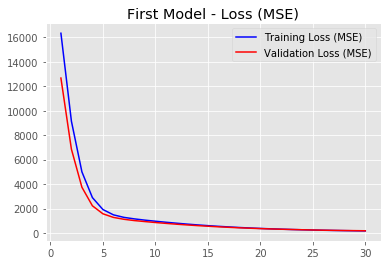

In [79]:
generate_plot(epochs, loss, epochs, val_loss, 'Loss (MSE)', 'First Model')

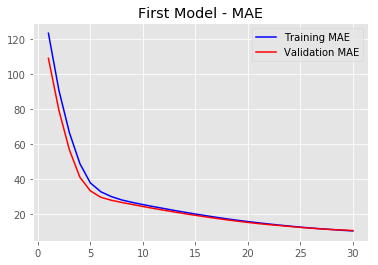

In [80]:
generate_plot(epochs, mae, epochs, val_mae, 'MAE', 'First Model')

In [82]:
first_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### Interpretation
There is clearly something wrong with this model. It does have 13 parameters for each of the features and one additional parameter for the bias term (0th feature, that is always unity). 

But the validation set error/loss is consistently lower than the test set error/loss. This is counterintuitive, as I have always found the validation loss to be higher than the test loss and not the other way round. 

Stack overflow seems to think this may be due to the training set having samples that are more difficult to fit than the validation set. 

I think it's a problem with the way the network's configured.

# Grid Search with `keras` Wrapper

## Environment Setup

In [254]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.datasets import boston_housing
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Wrapper Configuration

In [222]:
# Function used to create a model - passed as an arg to the Regressor
def create_model(units=1,activation='linear', loss_fn='mae', 
                optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=units, activation='linear', input_dim=13))
    model.compile(loss=loss_fn, optimizer=optimizer)
    return model

In [223]:
# Seeding random number generator
RANDOM_SEED = 7
np.random.seed(RANDOM_SEED)

In [24]:
# Load the dataset 
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [25]:
# Instantiating a KerasRegressor that can be used in conjunction with sklearn
model = KerasRegressor(build_fn=create_model, verbose=0)

## Making Grids for `GridSearchCV`

In [230]:
# List of hyperparam values to test
epochs = [10, 50, 100, 150, 200]
batch_sizes = [10, 20, 40, 60, 80, 100]
optimizers = ['adam', 'rmsprop', 'adagrad', 'adadelta', 'sgd', 'adamax', 'nadam']
units = [1, 2, 4, 8, 16, 64, 128]
activations = ['linear', 'relu', 'tanh', 'sigmoid']

In [231]:
# Making individual param grids
pg_epochs = dict(epochs=epochs)
pg_batch_sizes = dict(batch_size=batch_sizes)
pg_optimizers = dict(optimizer=optimizers)
pg_n_units = dict(units=units)
pg_activations = dict(activation=activations)

In [232]:
# Making composite param grids for features I think should be tested together
pg_epoch_batch = dict(epochs=epochs, batch_size=batch_sizes)
pg_units_activations = dict(units=units, activation=activations)

In [130]:
# Configuring matplotlib for generating plots of mean and standard deviation in each cross validated model
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
def plot_cv_result(param_list, results, qty_name, figsize=(5, 3), bar_thickness=10):
    """Extracts and plots mean and standard deviation of losses on all cross validated models for a given
    hyperparameter"""
    param_name = [key for key in param_list[0]][0]
    param_vals = sum([list(param_dict.values()) for param_dict in param_list], [])
    plt.figure(figsize=figsize)
    plt.bar(param_vals, results, width=bar_thickness, edgecolor='k')
    plt.xlabel(param_name)
    plt.ylabel(f'Loss - {qty_name}')
    plt.title(f'{qty_name} in Loss for {param_name}')
    plt.grid(True)
    plt.tight_layout()

In [249]:
# Function to display results of a grid 
def display_single_hyp_results(grid_result, bar_thickness=10, figsize=(5, 3), 
                              generate_plot=True):
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with %r" % (mean, stdev, param))

    if(generate_plot):
        plot_cv_result(params, means, qty_name='Mean', figsize=figsize, 
                       bar_thickness=bar_thickness)
        plot_cv_result(params, stds, qty_name='Standard Deviation', figsize=figsize, 
                       bar_thickness=bar_thickness)

## Grid Search for Individual Param Grids

### Epochs

In [158]:
from sklearn.metrics import mean_squared_error

In [161]:
model = KerasRegressor(build_fn=create_model, batch_size=10, verbose=0)
grid_epochs = GridSearchCV(estimator=model, param_grid=pg_epochs,
                          n_jobs=-1, cv=5, scoring='neg_mean_absolute_error')
epochs_result = grid_epochs.fit(train_data, train_labels)

/Users/saadmashkoor/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -4.743247 using {'epochs': 200}
-33.006695 (22.829323) with {'epochs': 10}
-6.629485 (0.738840) with {'epochs': 50}
-5.486243 (0.662991) with {'epochs': 100}
-4.788357 (0.522128) with {'epochs': 150}
-4.743247 (0.587084) with {'epochs': 200}


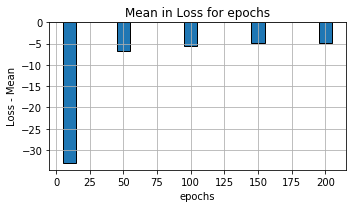

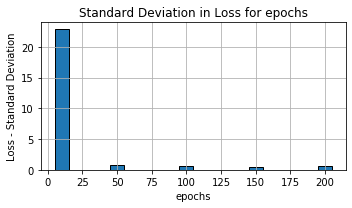

In [176]:
display_single_hyp_results(epochs_result)

### Batch Size
- `sklearn` is very weird about cross validation scoring. For consistency, higher scores for scoring metrics are always supposed to be better. This is why the mean absolute error for the loss in cross validation is negative: it's the negative of a mean absolute error.
- Based on the elbow method, improvements in mean negative loss and standard deviation stop after 100 epochs. So choosing this as the value for epochs going forward.

In [181]:
optimal_epochs=100

In [165]:
model_batch_size = KerasRegressor(build_fn=create_model, epochs=optimal_epochs)

In [166]:
grid_batch_size = GridSearchCV(estimator=model, param_grid=pg_batch_sizes,
                          n_jobs=-1, cv=5, scoring='neg_mean_absolute_error')

In [167]:
batch_size_result = grid_batch_size.fit(train_data, train_labels)

/Users/saadmashkoor/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -130.344787 using {'batch_size': 60}
-209.110452 (103.295047) with {'batch_size': 10}
-167.264310 (106.014845) with {'batch_size': 20}
-155.527061 (82.105742) with {'batch_size': 40}
-130.344787 (127.009606) with {'batch_size': 60}
-213.835709 (55.064812) with {'batch_size': 80}
-180.767901 (109.471581) with {'batch_size': 100}


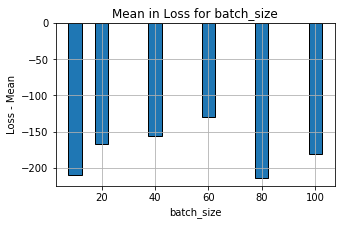

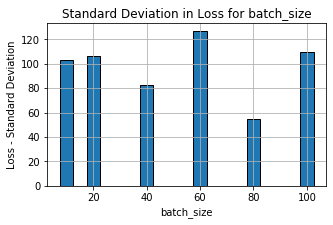

In [210]:
display_single_hyp_results(batch_size_result, bar_thickness=5)

## Optimizers

In [180]:
optimal_batch_size=60

In [182]:
model_optimizers = KerasRegressor(build_fn=create_model, epochs=optimal_epochs, 
                                  batch_size=optimal_batch_size)

In [184]:
grid_optimizers = GridSearchCV(estimator=model, param_grid=pg_optimizers,
                          n_jobs=-1, cv=5, scoring='neg_mean_absolute_error')

In [185]:
, optimizers_result = grid_optimizers.fit(train_data, train_labels)

/Users/saadmashkoor/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [253]:
display_single_hyp_results(optimizers_result, figsize=(5, 3),
                          bar_thickness=5, generate_plot=False)

Best: -67.443587 using {'optimizer': 'adam'}
-67.443587 (39.425953) with {'optimizer': 'adam'}
-151.150375 (110.894468) with {'optimizer': 'rmsprop'}
-215.075316 (106.351579) with {'optimizer': 'adagrad'}
-252.574004 (94.671249) with {'optimizer': 'adadelta'}
-1750.545189 (370.689125) with {'optimizer': 'sgd'}
-154.932589 (60.181947) with {'optimizer': 'adamax'}
-103.081848 (69.973832) with {'optimizer': 'nadam'}


## Number of Units
Can't vary the number of units for the model we've built. It's a single layer NN that attempts to perform linear regression. If I change the number of hidden units from `n` to `n+1`, this means the output of the model will also change from being `n` dimensional to `n+1` dimensional. This is a problem because the labels are one dimensional, so `y_pred` will not be of the same dimension as `y_label`.

## Activations

In [245]:
model_activations = KerasRegressor(build_fn=create_model, epochs=optimal_epochs, 
                                  batch_size=optimal_batch_size)

In [246]:
grid_activations = GridSearchCV(estimator=model, param_grid=pg_activations,
                          n_jobs=-1, cv=5, scoring='neg_mean_absolute_error')

In [255]:
activations_result = grid_activations.fit(train_data, train_labels)

/Users/saadmashkoor/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [250]:
display_single_hyp_results(activations_result, generate_plot=False)

Best: -10.810233 using {'activation': 'linear'}
-10.810233 (1.870645) with {'activation': 'linear'}
-11.483593 (4.061746) with {'activation': 'relu'}
-16.655073 (17.297612) with {'activation': 'tanh'}
-21.539289 (14.623154) with {'activation': 'sigmoid'}


## `GridSearch` for multiple Hyperparameters

Previous investigation has focused on finding the optimal value of a single hyperparameter while keeping all other hyperparameters constant. I tried to follow the sequence recommended by [Jason Brownlee on Machine Learning Mastery](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/), and hoped this was enough to optimise the model's performance.

Now, I will attempt to optimise pairs of related hyperparameters at the same time. Since `n_units` can't really change, this means a good possible combo of hyperparms to test is **epochs with batch size** and **activation function with optimizer**.

### Epochs with Batch Size

In [256]:
epoch_batch_model = KerasRegressor(build_fn=create_model, verbose=0)

In [257]:
pg_epoch_batch = dict(epochs=epochs, batch_size=batch_sizes)

In [260]:
epoch_batch_grid = GridSearchCV(estimator=epoch_batch_model, param_grid=pg_epoch_batch,
                               scoring='neg_mean_absolute_error', n_jobs=-1, 
                               cv=5)

In [261]:
epoch_batch_results = epoch_batch_grid.fit(train_data, train_labels)

/Users/saadmashkoor/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [262]:
def display_gridCV_results(grid_result):
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

In [263]:
display_gridCV_results(epoch_batch_results)

Best: -4.683919 using {'batch_size': 10, 'epochs': 200}
-91.545257 (81.499144) with: {'batch_size': 10, 'epochs': 10}
-6.010287 (0.844852) with: {'batch_size': 10, 'epochs': 50}
-5.052248 (0.534079) with: {'batch_size': 10, 'epochs': 100}
-4.858519 (0.554911) with: {'batch_size': 10, 'epochs': 150}
-4.683919 (0.683076) with: {'batch_size': 10, 'epochs': 200}
-59.723240 (36.079726) with: {'batch_size': 20, 'epochs': 10}
-16.150880 (8.955171) with: {'batch_size': 20, 'epochs': 50}
-7.298395 (3.011324) with: {'batch_size': 20, 'epochs': 100}
-5.179211 (0.769638) with: {'batch_size': 20, 'epochs': 150}
-5.073305 (0.647428) with: {'batch_size': 20, 'epochs': 200}
-87.861759 (33.513784) with: {'batch_size': 40, 'epochs': 10}
-25.385681 (19.867951) with: {'batch_size': 40, 'epochs': 50}
-11.564920 (5.135842) with: {'batch_size': 40, 'epochs': 100}
-6.764724 (1.417006) with: {'batch_size': 40, 'epochs': 150}
-5.663758 (0.942563) with: {'batch_size': 40, 'epochs': 200}
-220.252866 (126.527136) 

In [264]:
# TODO: Find out a way to plot these as grouped bar graphs

### Activation with Optimizer

In [265]:
act_opt_model = KerasRegressor(build_fn=create_model, verbose=0, epochs=100, batch_size=10)

In [266]:
pg_act_opt = dict(activation=activations, optimizer=optimizers)

In [267]:
grid_act_opt = GridSearchCV(estimator=act_opt_model, param_grid=pg_act_opt,
                           scoring='neg_mean_absolute_error', n_jobs=-1,
                           cv=5)

In [268]:
act_opt_results = grid_act_opt.fit(train_data, train_labels)

/Users/saadmashkoor/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [269]:
display_gridCV_results(act_opt_results)

Best: -5.182580 using {'activation': 'tanh', 'optimizer': 'adam'}
-5.450716 (0.813560) with: {'activation': 'linear', 'optimizer': 'adam'}
-5.505991 (0.611441) with: {'activation': 'linear', 'optimizer': 'rmsprop'}
-179.007846 (133.059391) with: {'activation': 'linear', 'optimizer': 'adagrad'}
-190.949276 (101.664497) with: {'activation': 'linear', 'optimizer': 'adadelta'}
-1617.111455 (744.727104) with: {'activation': 'linear', 'optimizer': 'sgd'}
-6.286957 (0.819522) with: {'activation': 'linear', 'optimizer': 'adamax'}
-5.402540 (1.046222) with: {'activation': 'linear', 'optimizer': 'nadam'}
-5.496571 (0.411616) with: {'activation': 'relu', 'optimizer': 'adam'}
-5.347776 (0.667287) with: {'activation': 'relu', 'optimizer': 'rmsprop'}
-68.348538 (26.824778) with: {'activation': 'relu', 'optimizer': 'adagrad'}
-148.723343 (130.323830) with: {'activation': 'relu', 'optimizer': 'adadelta'}
-1589.317078 (648.612029) with: {'activation': 'relu', 'optimizer': 'sgd'}
-6.215508 (1.526702) wi

## Testing Model with Optimized Hyperparams

In [312]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [313]:
test_model = Sequential()
test_model.add(Dense(units=1, activation='linear', input_shape=(13, )))

In [314]:
test_model.compile(optimizer='adam', loss='mae')

In [315]:
test_model_history = test_model.fit(x=train_data, y=train_labels,
                                   epochs=60, batch_size=10,
                                   validation_data=(test_data, test_labels), verbose=0)

In [316]:
# Extracting data from history object
history = test_model_history.history;
epochs = range(1, len(history['loss']) + 1)
loss = history['loss']
val_loss = history['val_loss']

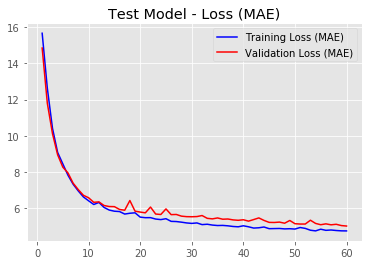

In [317]:
generate_plot(epochs, loss, epochs, val_loss, 'Loss (MAE)', 'Test Model')

## Analysis
- Optimal hyperparameters
    - epochs: 60
    - optimizer: adam
    - batch size: 10
    - activation: `tanh` but chose linear because linear regression

## Test Performance

In [318]:
y_pred = test_model.predict(x=test_data)

In [320]:
mae = np.mean(np.abs(y_pred - test_labels))

In [321]:
mae

7.8679340129355095

The mean absolute error on the validation set is quite a bit higher than the minimum mean absolute error in the validation set at the end of 60 epochs. This, I really don't understand because the two sets are the same, so theoretically we should get the same MAE.

In any case, there is room for improvement. Next step is to try regularization and dropout.